<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

X = [np.array([[1, 2, 1], [3, 4, 3], [5, 6, 5]]), np.array([[7, 8, 7], [9, 10, 9], [11, 12, 11]])]
V = [np.array([[1], [2], [3]]), np.array([[4], [5], [6]])]

assert np.array_equal(sum_prod(X, V), np.array([[118], [160], [202]]))

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

matrix = np.array([[0.6, 0.2, 0.7], [0.6, 0.1, 0.9], [0.9, 0.1, 0.8]])

assert np.array_equal(binarize(matrix), np.array([[1, 0, 1], [1, 0, 1], [1, 0, 1]]))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
   return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(column) for column in mat.T]
    
matrix = np.array([[1, 1, 1], [2, 2, 2], [4, 5, 6]])
unique_c = unique_columns(matrix)
unique_r = unique_rows(matrix)

# пока сдаюсь
print(unique_c)
print(unique_r)

# assert np.array_equal(unique_c, np.array([np.array([1, 2, 4]), np.array([1, 2, 5]), np.array([1, 2, 6])]))
# assert np.array_equal(unique_r, np.array([np.array([1, 2]), np.array([1, 2]), np.array([2, 5, 6])]))

[array([1, 2, 4]), array([1, 2, 5]), array([1, 2, 6])]
[array([1]), array([2]), array([4, 5, 6])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

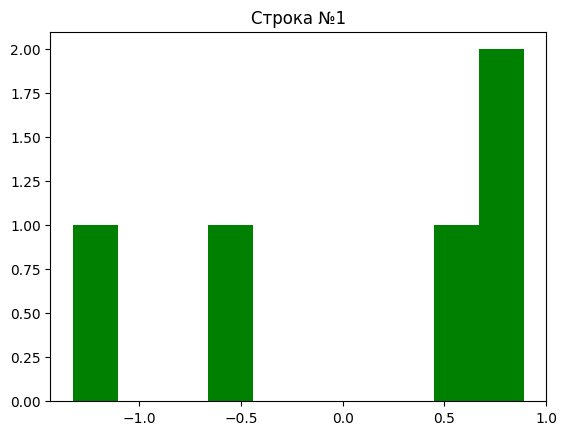

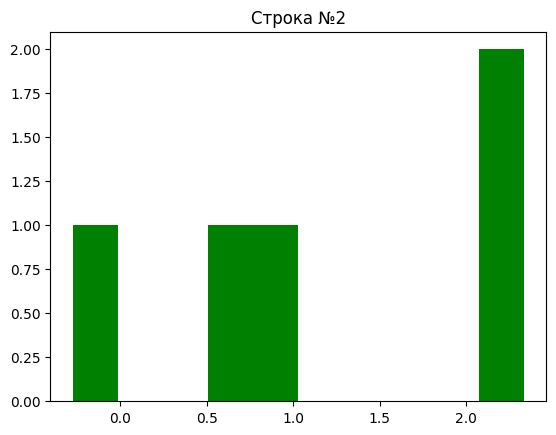

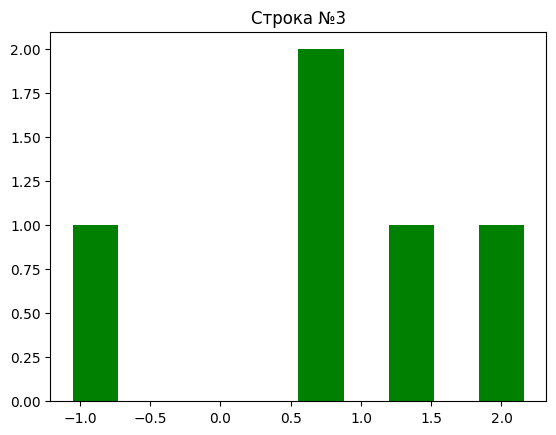

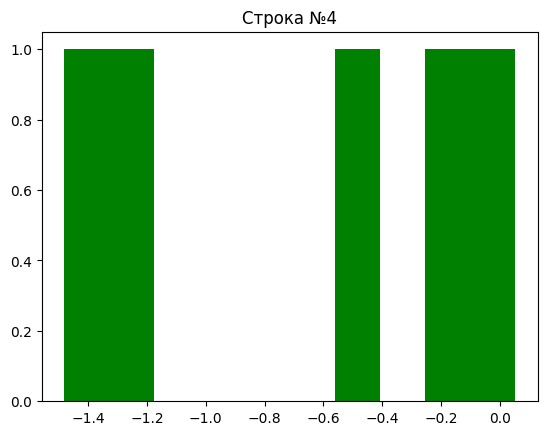

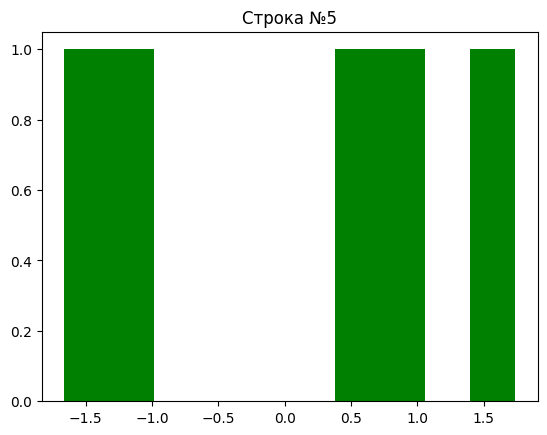

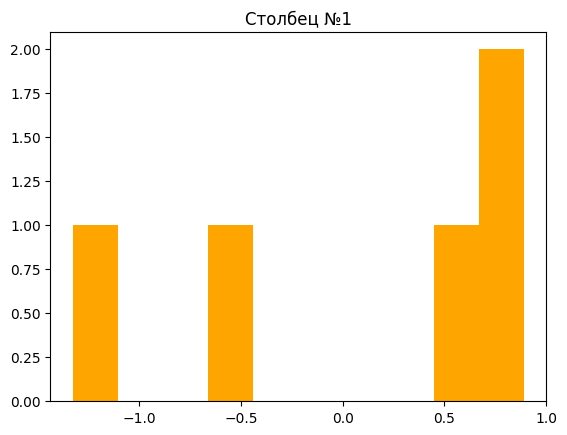

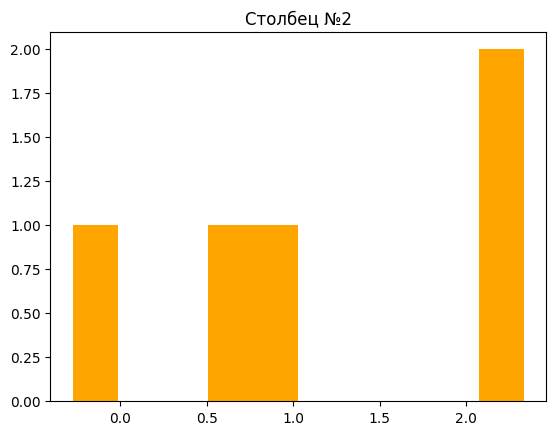

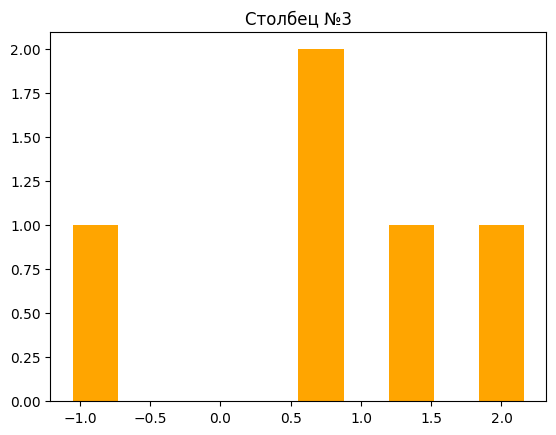

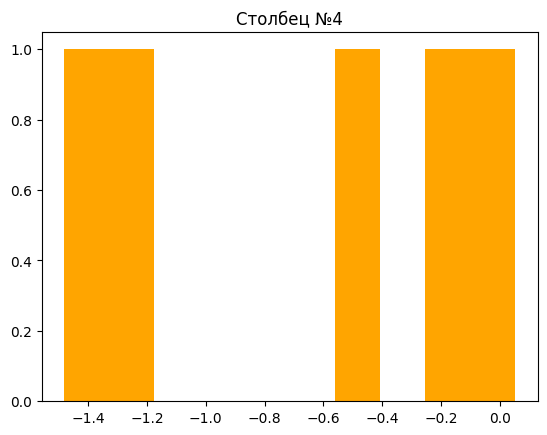

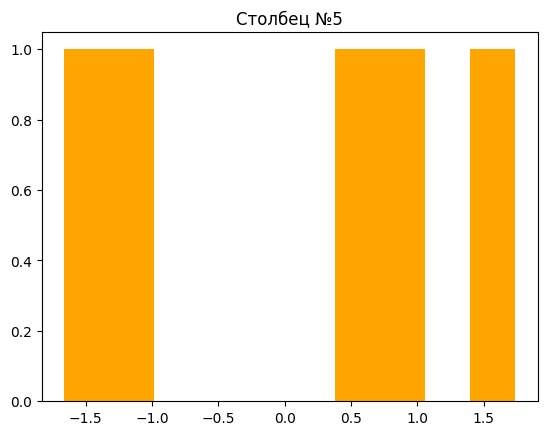

Матрица: [[ 0.60676745  0.78615265  0.89025888 -0.48134895 -1.32483753]
 [ 2.33427437  0.51401009 -0.27463203  2.1851632   0.80986674]
 [ 0.7944727   2.16004427  0.71191991  1.2954612  -1.0495072 ]
 [-0.55587672 -1.17636552  0.05273069 -1.48130301 -0.10916406]
 [-1.66127501 -1.08209009  1.73614648  0.98105237  0.44089213]]

Мат. ожидание для строк: [ 0.0953985   1.11373647  0.78247818 -0.65399572  0.08294518]

Дисперсия для строк: [0.7440301  1.00344873 1.10442654 0.35264773 1.61348166]

Мат. ожидание для столбцов: [ 0.30367256  0.24035028  0.62328478  0.49980496 -0.24654999]

Дисперсия для столбцов: [1.81118778 1.56278942 0.48987582 1.71851042 0.68298243]



In [5]:
def fill_matrix(m, n):
    matrix = np.random.randn(m, n)
    
    row_mean = np.mean(matrix, axis=1)
    row_var = np.var(matrix, axis=1)
    col_mean = np.mean(matrix, axis=0)
    col_var = np.var(matrix, axis=0)
    
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], color = "green")
        plt.title(f"Строка №{i+1}")
        plt.show()

    for i in range(n):
        plt.figure()
        plt.hist(matrix[i], color = "orange")
        plt.title(f"Столбец №{i+1}")
        plt.show()

    return matrix, row_mean, row_var, col_mean, col_var

matrix, row_mean, row_var, col_mean, col_var = fill_matrix(5, 5)
    
print(f"Матрица: {matrix}\n")
print(f"Мат. ожидание для строк: {row_mean}\n")
print(f"Дисперсия для строк: {row_var}\n")
print(f"Мат. ожидание для столбцов: {col_mean}\n")
print(f"Дисперсия для столбцов: {col_var}\n")

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)

    for idx, x in np.ndenumerate(matrix):
        matrix[idx] = b if sum(idx) % 2 else a

    return matrix

assert np.array_equal(chess(5, 5, 1, 0), [[1, 0, 1, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 1]])
assert np.array_equal(chess(1, 1, 1, 0), [[1]])

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

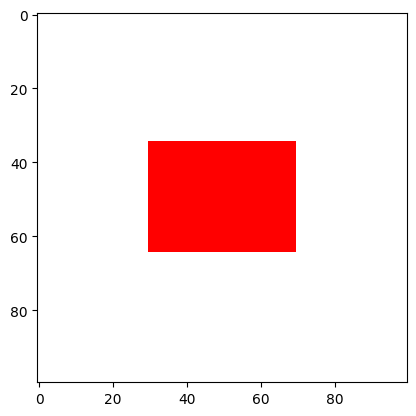

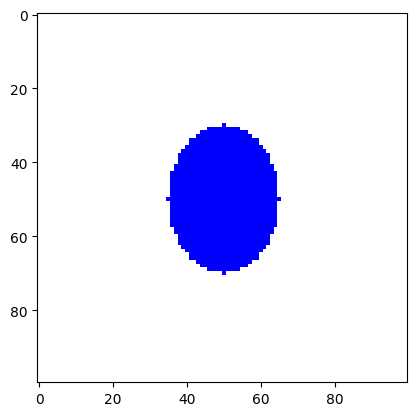

In [7]:
def draw_rectangle(image, m, n, a, b, bg_color, color):
    image[:,:] = bg_color
    image[len(image[0]) // 2 - a:len(image[0]) // 2 + a, len(image[1]) // 2 - b:len(image[1]) // 2 + b] = color

def draw_ellipse(image, m, n, a, b, bg_color, color):
    image[:,:] = bg_color
    y, x = np.ogrid[:m, :n]
    mask = ((x - n // 2) ** 2 / a ** 2 + (y - m // 2) ** 2 / b ** 2) <= 1
    image[mask] = color

m, n = 100, 100
image = np.zeros((m, n, 3), dtype=np.uint8)
bg_color = (255, 255, 255)
rect_color = (255, 0, 0)
ellipse_color = (0, 0, 255)

draw_rectangle(image, m, n, 15, 20, bg_color, rect_color)
plt.imshow(image)
plt.show()

draw_ellipse(image, m, n, 15, 20, bg_color, ellipse_color)
plt.imshow(image)
plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [13]:
def solve(row, p):
    mean = np.mean(row)
    variance = np.var(row)
    std = np.std(row)

    local_min = []
    local_max = []
    
    for i in range(1, len(row) - 1):
        if row[i] < row[i-1] and row[i] < row[i+1]:
            local_min.append(row[i])
        elif row[i] > row[i-1] and row[i] > row[i+1]:
            local_max.append(row[i])

    mov_avg = np.convolve(row, np.ones(p) / p, mode='valid')

    return mean, variance, std, local_min, local_max, mov_avg

mean, variance, std, local_min, local_max, mov_avg = solve(np.array([6, 4, 6, 8, 4, 12, 14, 10, 18, 20]), 3)
print(f"Мат. ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Станд. отклонение: {std}")
print(f"Локальные минимумы: {local_min}")
print(f"Локальные максимумы: {local_max}")
print(f"Скользящее среднее: {mov_avg}")



Мат. ожидание: 10.2
Дисперсия: 29.160000000000004
Станд. отклонение: 5.4
Локальные минимумы: [4, 4, 10]
Локальные максимумы: [8, 14]
Скользящее среднее: [ 5.33333333  6.          6.          8.         10.         12.
 14.         16.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [9]:
def one_hot_encoding(labels):
    return np.eye(len(labels), dtype=int)[labels]

labels = [0, 2, 3, 0]
print(one_hot_encoding(labels))
     

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
